In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
table = np.loadtxt('uploads/EIC_quark.txt',skiprows=1)

In [3]:
R = table[:,0]
qhat0 = table[:,1]
qhat02 = table[:,2]
qhat08 = table[:,3]

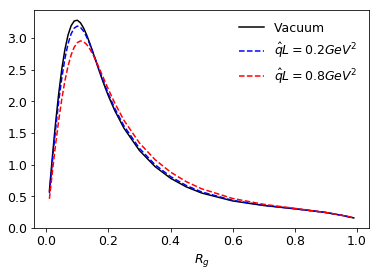

In [5]:
plt.plot(R,qhat0,color='black',label='Vacuum')
plt.plot(R,qhat02,'b--', label='$\hat{q}L=0.2GeV^2$')
plt.plot(R,qhat08,'r--', label='$\hat{q}L=0.8GeV^2$')
plt.xlabel('$R_g$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

In [6]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('delta_R')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
files = ["$HOME/EIC/output/1031.root"]
a = getData(files)


Processed $HOME/EIC/output/1031.root in 72.2 seconds


In [8]:
c = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
c = applyCut(c, 'pt_jet > 4', 'pt_jet > 4')
c = applyCut(c, '0.1 < y < 0.85', '0.1 < y < 0.85')
c = fixPhi(c, 'photon')
c = applyCut(c, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 40830934  fraction kept: 96.0
pt_jet > 4 10260699  fraction kept: 25.1
0.1 < y < 0.85 8025044  fraction kept: 78.2
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 7259027  fraction kept: 90.5


In [9]:
c3 = applyCut(c, '20 < pt_electron < 35', '20 < pt_electron < 35')

20 < pt_electron < 35 257335  fraction kept: 3.5


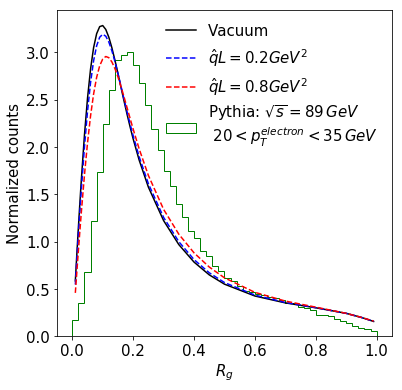

In [10]:
fig = plt.figure(figsize=(6,6))
hist = plt.hist(c3['delta_R'], range=(0,1), bins=50)
plt.cla()
weights = [np.trapz(qhat0,R)/integrate(0.02, hist[0], 0, 1)] * len(c3['delta_R'])
plt.hist(c3['delta_R'], range=(0,1), bins=50, histtype='step', color='green', label='Pythia: $\sqrt{s} = 89 \, GeV$ \n $20 < p_T^{electron} < 35 \, GeV$', weights=weights)
plt.plot(R,qhat0,color='black',label='Vacuum')
plt.plot(R,qhat02,'b--', label='$\hat{q}L=0.2GeV^2$')
plt.plot(R,qhat08,'r--', label='$\hat{q}L=0.8GeV^2$')
plt.xlabel('$R_g$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')

plt.savefig('images/deltar_3.pdf', bbox_inches='tight')